In [1]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import os
import random

In [2]:
#Custom!!
NAME = "10-05_test1_00"

In [19]:
classes = ["General trash","Paper","Paper pack","Metal","Glass","Plastic","Styrofoam","Plastic bag","Battery","Clothing"]
# path = "./swin_git/ai_stage/cascade_rcnn_swin_b/check_point/swin_b_cascade/submission_0.001.csv"
# path = "./swin_git/ai_stage/cascade_rcnn_swin_b/check_point/swin_b_cascade/submission_0.05.csv"
path = "./swin_git/ai_stage/cascade_rcnn_swin_b/check_point/swin_b_cascade/submission_0.25.csv"
df = pd.read_csv(path)

In [20]:
def getImage(imageNum):
	predict, imagePath = df.iloc[imageNum]

	objectList = getObjectFromPredict(predict)
	image = readImage(imagePath)
	drawnImage = drawObjectInImage(image, objectList)
	return drawnImage
	
def getObjectFromPredict(predict):
	predictList = predict.split()

	objectList = []
	for i in range(0,len(predictList),6):
		imageDict = {}
		imageDict["class"] = classes[int(predictList[i])]
		imageDict["confidence"] = predictList[i+1]
		imageDict["x1"] = float(predictList[i+2])
		imageDict["y1"] = float(predictList[i+3])
		imageDict["x2"] = float(predictList[i+4])
		imageDict["y2"] = float(predictList[i+5])
		objectList.append(imageDict)
	
	return objectList

def readImage(imagePath):
	return Image.open(os.path.join("dataset",imagePath))

def drawObjectInImage(image, objectList):
	draw = ImageDraw.Draw(image)

	for obj in objectList:
		x1, y1, x2, y2 = obj["x1"], obj["y1"], obj["x2"], obj["y2"]
		draw.rectangle(((x1,y1),(x2,y2)),width=3 ,outline=(random.randint(0,255),random.randint(0,255),random.randint(0,255)))

		imageFont = ImageFont.load_default()
		text = obj["class"] + "  " + obj["confidence"]
		text_width, text_height = imageFont.getsize(text)
		draw.rectangle(((x1, y1), (x1 + text_width, y1 + text_height)), fill=(0, 0, 0))
		draw.text((x1, y1), text, font=imageFont, fill=(255, 255, 255))
	image.save("1.jpg")

	return image

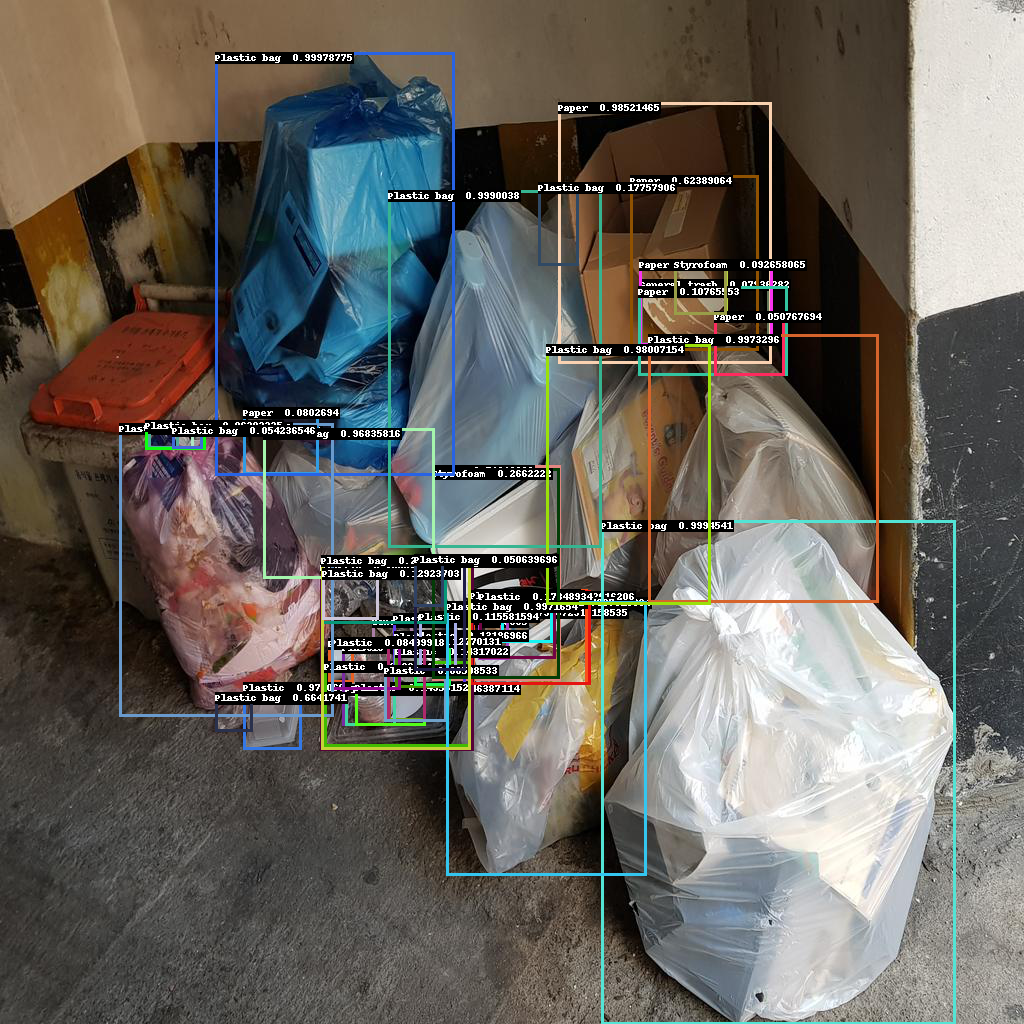

In [21]:
getImage(0)